Chest X-Ray Image Classification

## Importing Libraries and Loading Images

### Libraries

In [28]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [32]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=500)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=125)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=8)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

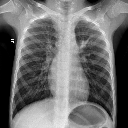

In [5]:
array_to_img(train_images[10])

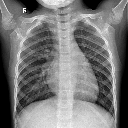

In [6]:
array_to_img(train_images[72])

## Images and Labels

In [33]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 500
Number of testing samples: 125
Number of validation samples: 8
train_images shape: (500, 128, 128, 1)
train_labels shape: (500, 2)
test_images shape: (125, 128, 128, 1)
test_labels shape: (125, 2)
val_images shape: (8, 128, 128, 1)
val_labels shape: (8, 2)


>Images

In [8]:
#Reshaping the images
# train_images = train_images.reshape(500, -1).T
# test_images = test_images.reshape(125, -1).T
# val_images = val_images.reshape(8, -1).T

In [35]:
#Reshaping the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)

In [36]:
#Previewing the shape of train_images_unrow
print('Train Images:',np.shape(train_images))
print('Test Images:',np.shape(test_images))
print('Validation Images:',np.shape(val_images))

Train Images: (500, 16384)
Test Images: (125, 16384)
Validation Images: (8, 16384)


>Labels

In [10]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
# train_labels_final = train_labels.T[[1]]
# test_labels_final = test_labels.T[[1]]
# val_labels_final = val_labels.T[[1]]

In [38]:
train_l = np.reshape(train_labels[:,0], (500,1))
test_l= np.reshape(test_labels[:,0], (125,1))
val_l = np.reshape(val_labels[:,0], (8,1))

In [39]:
print('Train Labels:',np.shape(train_l))
print('Test Labels:',np.shape(test_l))
print('Validation Labels:',np.shape(val_l))

Train Labels: (500, 1)
Test Labels: (125, 1)
Validation Labels: (8, 1)


Standardizing the Data

numpy.ndarray

Train Test Split

## Baseline Model

In [47]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(16384,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

In [49]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 93252.5244 - acc: 0.4114 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6868 - acc: 0.7593 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6838 - acc: 0.7320 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6802 - acc: 0.7315 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6743 - acc: 0.7597 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6729 - acc: 0.7370 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6683 - acc: 0.7503 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6633 - acc: 0

7/7 [==============================] - 0s 11ms/step - loss: 0.5924 - acc: 0.7338 - val_loss: 0.7472 - val_acc: 0.5000
Epoch 64/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5794 - acc: 0.7527 - val_loss: 0.7483 - val_acc: 0.5000
Epoch 65/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5783 - acc: 0.7534 - val_loss: 0.7492 - val_acc: 0.5000
Epoch 66/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5918 - acc: 0.7326 - val_loss: 0.7503 - val_acc: 0.5000
Epoch 67/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5807 - acc: 0.7483 - val_loss: 0.7514 - val_acc: 0.5000
Epoch 68/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5938 - acc: 0.7286 - val_loss: 0.7523 - val_acc: 0.5000
Epoch 69/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5900 - acc: 0.7335 - val_loss: 0.7534 - val_acc: 0.5000
Epoch 70/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5644 - acc: 0.7694 - 

In [50]:
result_train = model.evaluate(train_images, train_l)

16/16 [==============================] - 0s 2ms/step - loss: 0.5723 - acc: 0.7460


In [51]:
results_test = model.evaluate(test_images, test_l)

4/4 [==============================] - 0s 2ms/step - loss: 0.6142 - acc: 0.6960


In [52]:
result_train

[0.572269082069397, 0.7459999918937683]

In [53]:
results_test

[0.6142279505729675, 0.6959999799728394]